# Predicting Heart Disease Using Machine Learning

# import modules for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Loading data

In [2]:
df=pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Exploratory Data Analysis

In [4]:
df.shape

(319795, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [96]:
#we found that there is no null value

In [7]:
df.nunique() #checking each catagory 

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

# Data Transformation

In [8]:
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import OrdinalEncoder
enco=OrdinalEncoder()
#enco=OrdinalEncoder(categories=['AgeCategory','Race','Diabetic','GenHealth'])
enco.fit_transform(df[["AgeCategory","Race","Diabetic","GenHealth"]])

array([[ 7.,  5.,  2.,  4.],
       [12.,  5.,  0.,  4.],
       [ 9.,  5.,  2.,  1.],
       ...,
       [ 5.,  3.,  0.,  2.],
       [ 1.,  3.,  0.,  2.],
       [12.,  3.,  0.,  2.]])

In [9]:
df[["AgeCategory","Race","Diabetic","GenHealth"]]=enco.fit_transform(df[["AgeCategory","Race","Diabetic","GenHealth"]])

In [10]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7.0,5.0,2.0,Yes,4.0,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12.0,5.0,0.0,Yes,4.0,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,9.0,5.0,2.0,Yes,1.0,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,11.0,5.0,0.0,No,2.0,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,4.0,5.0,0.0,Yes,4.0,8.0,No,No,No


In [11]:
from sklearn.preprocessing import LabelEncoder
#from pandas.core.dtype.common import is_numeric_dtype
le=LabelEncoder()

In [12]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    df[col]=le.fit_transform(df[col])

In [13]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7.0,5.0,2.0,1,4.0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12.0,5.0,0.0,1,4.0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9.0,5.0,2.0,1,1.0,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11.0,5.0,0.0,0,2.0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4.0,5.0,0.0,1,4.0,8.0,0,0,0


In [14]:
df.describe().T #checking the data after encoding by their mean and std position 

,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.0,0.085595,0.279766,0.00,0.00,0.00,0.00,1.00
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
Smoking,319795.0,0.412477,0.492281,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,319795.0,0.068097,0.251912,0.00,0.00,0.00,0.00,1.00
Stroke,319795.0,0.037740,0.190567,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
DiffWalking,319795.0,0.138870,0.345812,0.00,0.00,0.00,0.00,1.00
Sex,319795.0,0.475273,0.499389,0.00,0.00,0.00,1.00,1.00
AgeCategory,319795.0,6.514536,3.564759,0.00,4.00,7.00,9.00,12.00


# Checking the corelation of data according to priority

In [14]:
print(df.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
PhysicalActivity    0.100030
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
AlcoholDrinking     0.032080
MentalHealth        0.028591
GenHealth           0.011062
SleepTime           0.008327
Name: HeartDisease, dtype: float64


In [106]:
#This shows that most columns are moderately correlated with HeartDisease, but 'SleepTime' and 'GenHealth' is very weakly correlated. The original dataset of nearly 300 variables was reduced to just about 
#18 variables so we are not deleting any variable

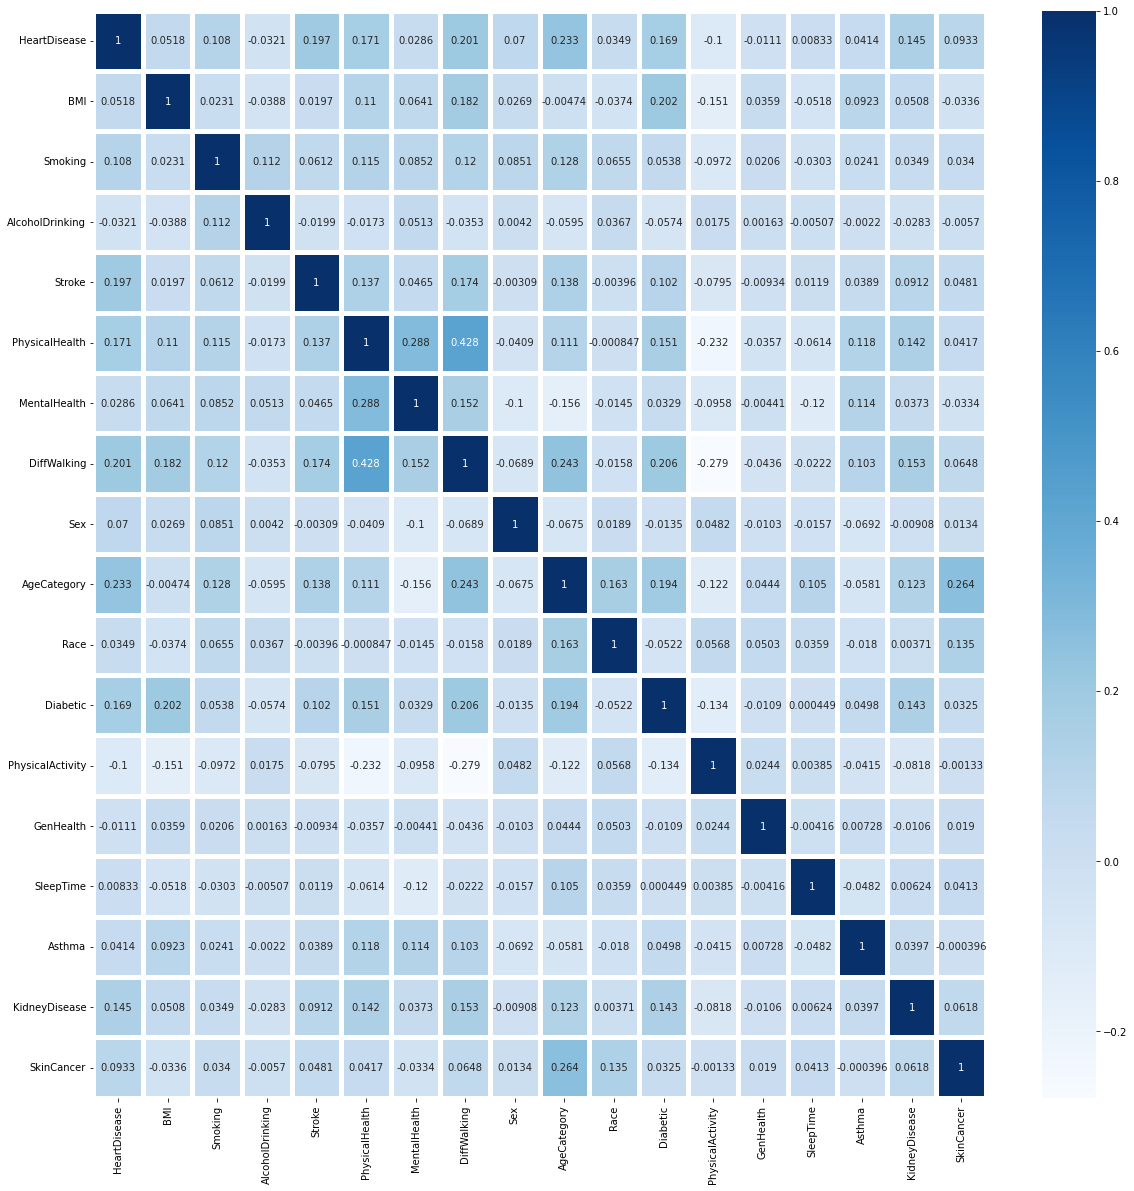

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt='.3g',linewidths=5, cmap='Blues')
plt.show()

In [110]:
#There is much imbalance in the datasets

#  Data splitting

In [16]:
x=df.drop('HeartDisease', axis=1)
y=df['HeartDisease']

In [17]:
x.shape

(319795, 17)

In [18]:
y.shape

(319795,)

In [19]:
y.value_counts(normalize=True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

In [ ]:
#0=HeartDisease, 1=NoHeartDisease

<AxesSubplot:>

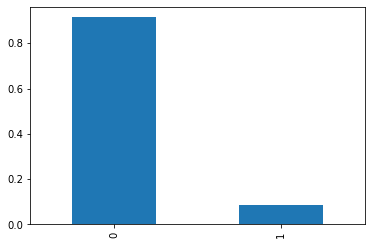

In [20]:
y.value_counts(normalize=True).plot(kind='bar')

In [24]:
#the Bar is showing that our Data is imbalance, 

# The Synthetic Minority Oversampling(SMOTETomek)

In [20]:
#now we will try to balance the dataset

In [128]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(random_state=42)
x_os,y_os=os.fit_resample(x,y)

In [129]:
x_os.shape

(580436, 17)

In [130]:
y_os.shape

(580436,)

In [131]:
y_os.value_counts(normalize=True)

0    0.5
1    0.5
Name: HeartDisease, dtype: float64

<AxesSubplot:>

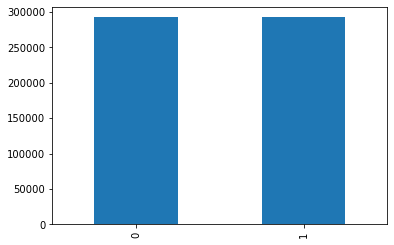

In [107]:
y_os.value_counts().plot(kind='bar')

In [108]:
df_os=pd.DataFrame(x_os)
df_os['HeartDisease']=y_os

In [51]:
df_os.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,0,7.0,5.0,2.0,1,4.0,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,12.0,5.0,0.0,1,4.0,7.0,0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9.0,5.0,2.0,1,1.0,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11.0,5.0,0.0,0,2.0,6.0,0,0,1,0
4,23.71,0,0,0,28.0,0.0,1,0,4.0,5.0,0.0,1,4.0,8.0,0,0,0,0


# Feature Selection

In [109]:
#now we will check which feature is more related with our target

In [110]:
from sklearn.feature_selection import SelectKBest

In [111]:
from sklearn.feature_selection import f_classif

In [112]:
fit_feature=SelectKBest(score_func=f_classif)

In [113]:
fit_feature.fit(x,y)

SelectKBest()

In [114]:
score_col=pd.DataFrame(fit_feature.scores_,columns=['score value'])

In [115]:
score_col

,score value
0,860.496283
1,3757.427784
2,329.441169
3,12889.495474
4,9600.384382
5,261.621916
6,13499.965619
7,1576.532332
8,18429.976221
9,388.948969


In [80]:
name_col=pd.DataFrame(x.columns, columns=['Feature_Name'])

In [81]:
top_feature=pd.concat([name_col,score_col],axis=1)

In [82]:
top_feature.nlargest(16,'score value')

,Feature_Name,score value
8,AgeCategory,18429.976221
6,DiffWalking,13499.965619
3,Stroke,12889.495474
4,PhysicalHealth,9600.384382
10,Diabetic,9351.001441
15,KidneyDisease,6887.135125
1,Smoking,3757.427784
11,PhysicalActivity,3232.186027
16,SkinCancer,2809.233041
7,Sex,1576.532332


# PCA

In [143]:
#now we will make our data optimization by PCA

In [144]:
from sklearn.preprocessing import MinMaxScaler
max=MinMaxScaler()
scale_x=max.fit_transform(x_os)

In [145]:
scale_x.shape

(580436, 17)

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca=PCA(n_components=3)

In [148]:
x_pca=pca.fit_transform(scale_x)

In [149]:
x_pca

array([[ 0.19235603,  0.09277706, -0.86401041],
       [-0.24101014, -0.63371911, -0.21155105],
       [ 0.06963589,  0.72254878, -0.12780775],
       ...,
       [ 1.0439474 , -0.48467696,  0.42713224],
       [-0.29144725, -0.71962222, -0.25322021],
       [ 0.31325671, -0.60865592,  0.16078176]])

In [150]:
pca_feature=pd.DataFrame(x_pca,columns=['pca1','pca2','pca3'])

In [151]:
pca_feature

,pca1,pca2,pca3
0,0.192356,0.092777,-0.864010
1,-0.241010,-0.633719,-0.211551
2,0.069636,0.722549,-0.127808
3,0.342154,-0.521077,0.190788
4,0.400566,-0.596990,0.020095
...,...,...,...
580431,-0.556691,-0.031523,0.513374
580432,-0.689755,-0.014133,0.413826
580433,1.043947,-0.484677,0.427132
580434,-0.291447,-0.719622,-0.253220


# Train & Test Data

In [132]:
from sklearn.model_selection import train_test_split

In [152]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_feature,y_os,test_size=0.3, random_state=42)

# optimizing decision tree(pre pruning)

In [153]:
#this can overcome the overfitting issue

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [177]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [178]:
clf=clf.fit(xtrain,ytrain)

In [179]:
y_pred=clf.predict(xtest)

In [180]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [181]:
np.array(ytest)

array([1, 1, 0, ..., 0, 1, 1])

In [182]:
accuracy_score(ytest,y_pred)

0.6709890829318157

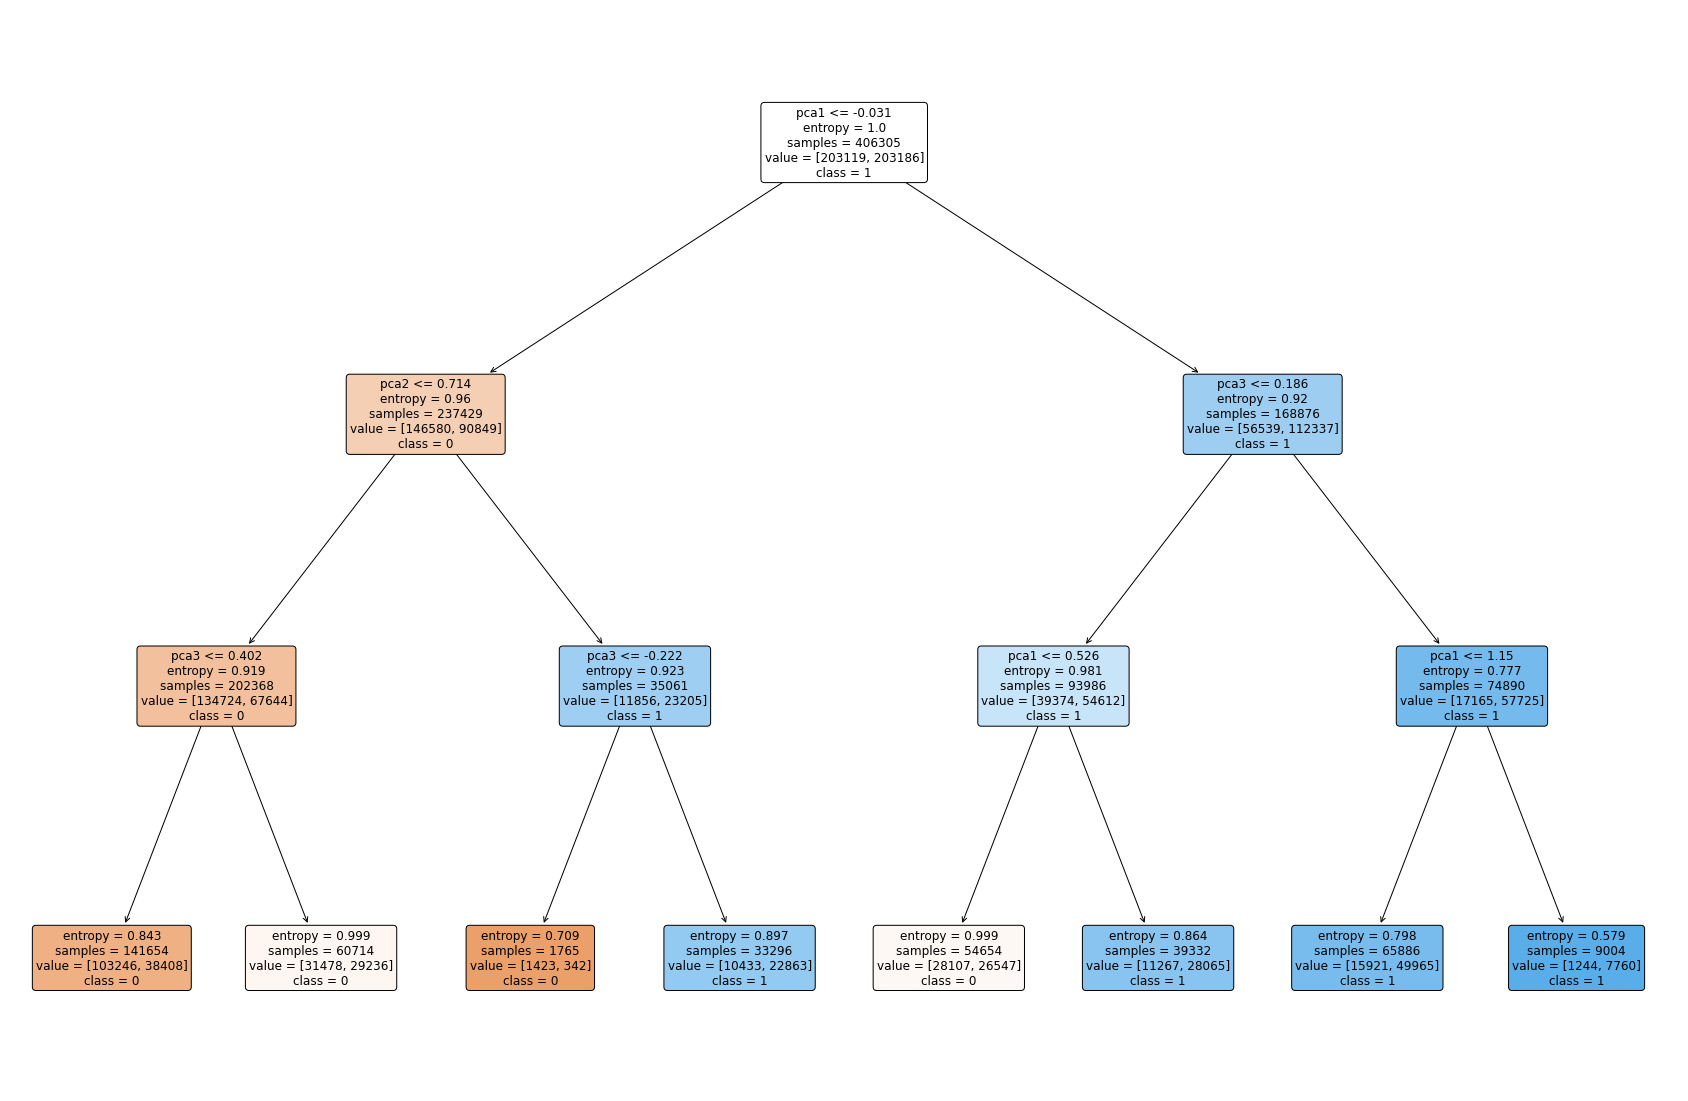

In [183]:
plt.figure(figsize=(30,20))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=xtrain.columns, class_names=['0','1'],fontsize=12)
plt.show()

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
grid_param={"criterion":["gini","entropy"],
           "splitter":["best","random"],"max_depth":range(2,7,1),"min_samples_split":range(2,15,1)}
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']})

In [186]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


[Text(0.4884072580645161, 0.9285714285714286, 'X[0] <= -0.052\nentropy = 1.0\nsamples = 406305\nvalue = [203119, 203186]'),
 Text(0.23487903225806453, 0.7857142857142857, 'X[2] <= -0.158\nentropy = 0.958\nsamples = 232399\nvalue = [143981, 88418]'),
 Text(0.11491935483870967, 0.6428571428571429, 'X[1] <= 0.397\nentropy = 0.914\nsamples = 133044\nvalue = [89257, 43787]'),
 Text(0.06451612903225806, 0.5, 'X[1] <= 0.081\nentropy = 0.862\nsamples = 90396\nvalue = [64659, 25737]'),
 Text(0.03225806451612903, 0.35714285714285715, 'X[0] <= -0.372\nentropy = 0.833\nsamples = 79830\nvalue = [58742, 21088]'),
 Text(0.016129032258064516, 0.21428571428571427, 'X[2] <= -0.301\nentropy = 0.313\nsamples = 3894\nvalue = [3674, 220]'),
 Text(0.008064516129032258, 0.07142857142857142, 'entropy = 0.0\nsamples = 260\nvalue = [260, 0]'),
 Text(0.024193548387096774, 0.07142857142857142, 'entropy = 0.33\nsamples = 3634\nvalue = [3414, 220]'),
 Text(0.04838709677419355, 0.21428571428571427, 'X[2] <= -0.865\ne

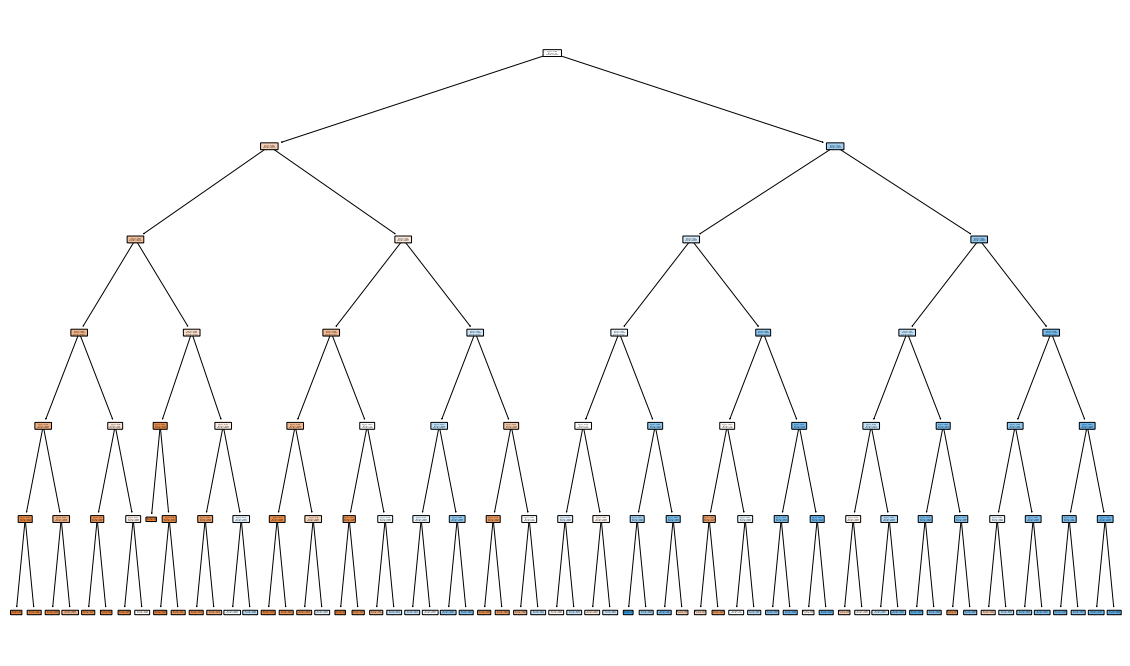

In [187]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=2, splitter='random')
clf.fit(xtrain,ytrain)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True, filled=True)

In [188]:
y_pred=clf.predict(xtest)

In [190]:
accuracy_score(ytest,y_pred)

0.681337613635711

# Model building

# DecisionTreeClassifier

In [191]:
train_accuracy=[]
test_accuracy=[]
max_features = [n for n in range(1,18)]

In [192]:
max_features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
for depth in max_features:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(xtrain, ytrain) # training
    
    #train accuracy
    train_acc = clf.score(xtrain, ytrain)
    train_accuracy.append(train_acc)
    
    #test accuracy
    test_acc = clf.score(xtest, ytest)
    test_accuracy.append(test_acc)
    
    print('Max Depth =%d, Train Acc = %f , Test Acc=%f' %(depth,train_acc,test_acc))

Max Depth =1, Train Acc = 0.637248 , Test Acc=0.637612
Max Depth =2, Train Acc = 0.665180 , Test Acc=0.665591
Max Depth =3, Train Acc = 0.675293 , Test Acc=0.674865
Max Depth =4, Train Acc = 0.689512 , Test Acc=0.689757
Max Depth =5, Train Acc = 0.698468 , Test Acc=0.698359
Max Depth =6, Train Acc = 0.715423 , Test Acc=0.715283
Max Depth =7, Train Acc = 0.723230 , Test Acc=0.721985
Max Depth =8, Train Acc = 0.733395 , Test Acc=0.730749
Max Depth =9, Train Acc = 0.739678 , Test Acc=0.735263
Max Depth =10, Train Acc = 0.746710 , Test Acc=0.741361
Max Depth =11, Train Acc = 0.754111 , Test Acc=0.743727
Max Depth =12, Train Acc = 0.763542 , Test Acc=0.748000
Max Depth =13, Train Acc = 0.774192 , Test Acc=0.751027
Max Depth =14, Train Acc = 0.786653 , Test Acc=0.755179
Max Depth =15, Train Acc = 0.801487 , Test Acc=0.758343
Max Depth =16, Train Acc = 0.816756 , Test Acc=0.760307
Max Depth =17, Train Acc = 0.833928 , Test Acc=0.765010


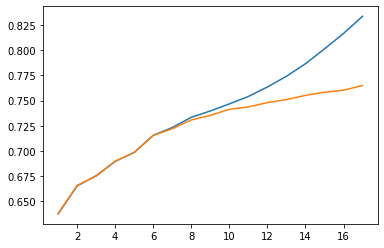

In [195]:
from matplotlib import pyplot as plt
plt.plot(max_features,train_accuracy)
plt.plot(max_features,test_accuracy)

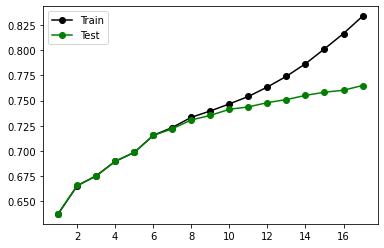

In [196]:
from matplotlib import pyplot as plt
plt.plot(max_features,train_accuracy, '-o', color='black',label='Train')
plt.plot(max_features,test_accuracy,'-o',color='green', label='Test')
plt.legend()

# Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100, random_state=0)
random.fit(xtrain,ytrain)
y_pred_rf=random.predict(xtest)
print(y_pred_rf)

[1 1 0 ... 1 1 1]


# LogisticRegression

In [197]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [198]:
#use train data to train the model features
model_lr=lr.fit (xtrain,ytrain)

In [204]:
lr_pred=lr.predict(xtest)
pd.DataFrame(np.c_[ytest,lr_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,1
4,1,1
...,...,...
174126,0,0
174127,1,1
174128,0,0
174129,1,0


In [213]:
lr_train=model_lr.score(xtest,ytest)
lr_test=model_lr.score(xtrain,ytrain)
print('Testing Accuracy :',lr_test)
print('Training Accuracy :',lr_train)

Testing Accuracy : 0.636731027184012
Training Accuracy : 0.6374855712078837


Classification Report 
----------------------
              precision    recall  f1-score   support

           0       0.73      0.62      0.67    103538
           1       0.54      0.67      0.60     70593

    accuracy                           0.64    174131
   macro avg       0.64      0.64      0.63    174131
weighted avg       0.66      0.64      0.64    174131



NameError: name 'metrics' is not defined

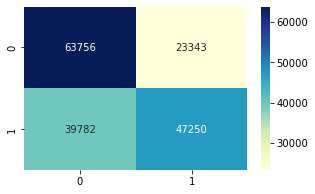

In [217]:
print('Classification Report \n----------------------')
print(classification_report(lr_pred, ytest))
plt.figure(figsize=(5,3))
data = confusion_matrix(ytest, lr_pred)
lr_con = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
sns.heatmap(lr_con, annot=True, fmt='g',cmap="YlGnBu")
f1 = metrics.f1_score(lr_pred, ytest)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [202]:
results*100

63.673102718401196